# LAB 03: Network statistics and directed graphs

July 12th 2021

* This tutorial aims at helping you to handle directed graphs,to measure network statistics and to use twitter data for building social networks
* There is no marking for this tutorial. You do not need to submit your solution to us, but this exercise will help you to start working on your project
* In the begining of this tutorial you will find a similar code than used in the class. In the end, I added exercises for you.
* We recommend you to solve this lab until next tuesday (July 19th).

## Twitter network

This tutorial is based on Menczer's online material: https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%204%20Tutorial.ipynb.

In the original tutorial, you will find instructions for authenticating on twitter. 

Here, for simplicity, we are using a pre-defined set of tweets:

https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/science_tweets.json.

After downloading the json file:

* Read the json file
* Show the fields 'user' and 'text' of the first tweet
* Filter retweets
* Build a directed graph in which the users correspond to nodes and the edges correspond to retweets, with the direction of the retweet flow: from the retweeted user to the retweeter
* Obtain the number of nodes and edges
* Obtain the average degree, and standard deviation
* Build a list of the probabilities for each degree
* Plot the degree distribution
* Sort the users by out degree (tip: import itemgetter from operator)
* Sort the users by out degree considering the weights
* Make a plot of the digraph in which the node sizes are proportional to the out degree

In [ ]:
!wget https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/science_tweets.json

--2022-07-12 19:57:59--  https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/science_tweets.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4932323 (4.7M) [text/plain]
Saving to: ‘science_tweets.json.1’

science_tweets.json 100%[===================>]   4.70M  --.-KB/s    in 0.07s   

2022-07-12 19:57:59 (63.3 MB/s) - ‘science_tweets.json.1’ saved [4932323/4932323]



{'id': 358464377, 'id_str': '358464377', 'name': 'Antonio Paris', 'screen_name': 'AntonioParis', 'location': '3rd Rock from the Sun', 'description': 'Planetary Scientist, Astrophysics Professor, Author of #Mars 3D, Combat Veteran with a Bronze Star Medal and from Puerto Rico.', 'url': 'https://t.co/6otM6pdGtc', 'entities': {'url': {'urls': [{'url': 'https://t.co/6otM6pdGtc', 'expanded_url': 'http://planetary-science.org/', 'display_url': 'planetary-science.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 410692, 'friends_count': 69880, 'listed_count': 2090, 'created_at': 'Fri Aug 19 23:49:31 +0000 2011', 'favourites_count': 41680, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 51771, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '131516', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/t

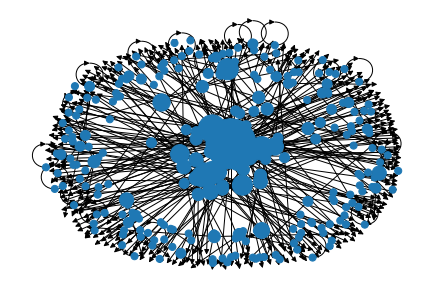

In [ ]:
import json

import matplotlib.pyplot as plt

import networkx as nx

import numpy as np

# Loading the data

search_tweets = json.load(open('science_tweets.json'))

print(search_tweets[0]['user'])
print(search_tweets[0]['text'])

# Filtering the retweets

retweets = []
for tweet in search_tweets:
  if 'retweeted_status' in tweet:
    retweets.append(tweet)

print(len(retweets))

# Creating a digraph

D = nx.DiGraph()

for retweet in retweets:
  retweeted_status = retweet['retweeted_status']
  retweeted = retweeted_status['user']['screen_name']
  retweeter = retweet['user']['screen_name']
  if D.has_edge(retweeted, retweeter):
    D.edges[retweeted, retweeter]['weight'] += 1
  else:
    D.add_edge(retweeted, retweeter, weight=1)

# Computing graph statistics
print(D.number_of_nodes())
print(D.number_of_edges())

degrees = np.array(D.degree)[:,1].astype(int)

print(degrees.mean())
print(degrees.std())

degree_count = nx.degree_histogram(D)
degree_prob = np.array(degree_count)/D.number_of_nodes()
print(degree_prob)

plt.plot(degree_prob)

out = D.out_degree

from operator import itemgetter

userranking = sorted(out, key=itemgetter(1), reverse=True)

out_weight = D.out_degree(weight='weight')
userranking_weight = sorted(out_weight, key=itemgetter(1), reverse=True)

print(userranking_weight)

%matplotlib inline

node_sizes = [D.out_degree(node, weight='weight')*50 for node in D.nodes]
nx.draw(D, node_size=node_sizes)


##  Exercise

Build the network (a graph or directed graph) that you and your partner chose for the project. Then:

* Show the number of nodes and edges
* Compute the density of edges in the network (divide the number of edges by the total number of possible pairs in the network)
* Compute the average degree
* Compute the standard deviation of the degree
* Build the list of degree probabilities
* Plot the degree distribution
* Plot your network